In [1]:
import tensorflow
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, BatchNormalization, ReLU, Conv2D, Dense, MaxPool2D, AvgPool2D, GlobalAvgPool2D, Concatenate

##############
import os

from os import listdir
from os.path import isfile, join
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import Xception

In [2]:
currentPath = os.getcwd()
print(currentPath)

C:\Users\CARLOS CORDERO\Desktop\ToG_pretrain


In [3]:
gpus = tensorflow.config.experimental.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


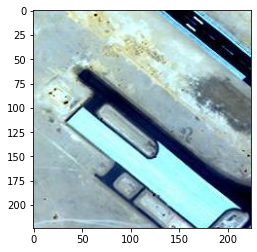

In [4]:
trainDB = currentPath + os.sep + "train20"
valDB = currentPath + os.sep + "val20"
data_set_path = currentPath + os.sep + "fMoW" + os.sep
XceptionWeightsPretrained = currentPath + os.sep + "xception_weights_tf_dim_ordering_tf_kernels_notop.h5"
model_name = "Xception"
classList = os.listdir(trainDB)

img = mpimg.imread(trainDB + os.sep + "airport" + os.sep + "airport_18_0_msrgb.jpg")
imgplot = plt.imshow(img)

In [5]:
lr = 0.00004
batch_size = 10
num_epochs = 200
pre_train_epochs = 20

num_steps_per_epoch = 4
img_rows, img_cols, img_channel = 299, 299, 3
num_categories = len(classList)

In [6]:
train_data_gen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=270,
    zoom_range=0.25,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='constant',
    cval = 0.)
    
train_generator = train_data_gen.flow_from_directory(
    directory=trainDB,
    target_size=(img_cols, img_rows),
    batch_size=batch_size,
    class_mode='categorical'
)

val_data_gen = ImageDataGenerator(
    rescale=1. / 225,
)
val_generator = val_data_gen.flow_from_directory(
    directory=valDB,
    target_size=(img_cols, img_rows),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 90 images belonging to 6 classes.
Found 29 images belonging to 6 classes.


In [7]:
print(train_generator.class_indices)
imgs, labels = next(train_generator)

{'airport': 0, 'airport_hangar': 1, 'airport_terminal': 2, 'amusement_park': 3, 'aquaculture': 4, 'archaeological_site': 5}


In [8]:
input = Input(shape=(img_rows, img_cols, img_channel))

In [9]:
def XceptionCustom(shape,pretrainedweights,  input_tensor, classes):
    xcNoTop = Xception(
        include_top=False, weights=pretrainedweights, input_tensor=input_tensor, input_shape=shape)
    
    xceptOut = xcNoTop.layers[-1].output
    x = GlobalAvgPool2D()(xceptOut)
    output = Dense(classes, activation="softmax")(x)
    model = Model(input_tensor, output)
        
    return model

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

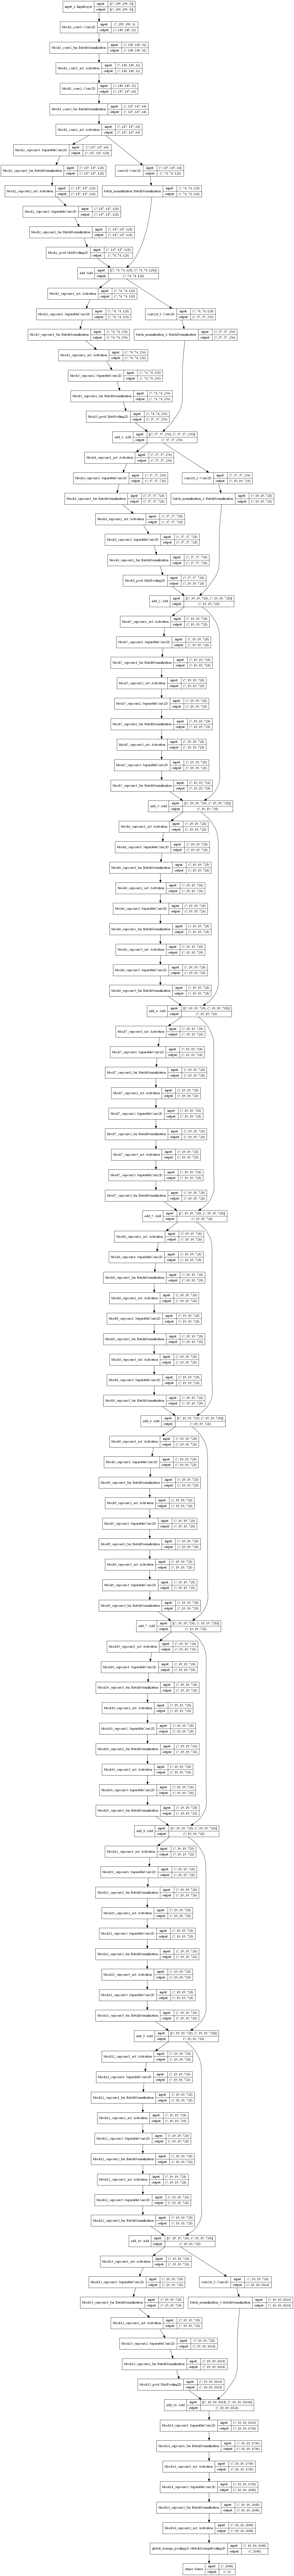

In [10]:
model = XceptionCustom((img_rows, img_cols, img_channel), XceptionWeightsPretrained, input, num_categories)

model.summary()
plot_model(model, show_shapes=True)

In [11]:
#optimizeFunc = SGD(learning_rate=lr, momentum=0.9, nesterov=True, decay=1e-6)
optimizeFunc = Adam(learning_rate=lr)
#model.compile(optimizer=optimizeFunc, loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizeFunc, loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit_generator(
    generator=train_generator,
    validation_data=val_generator,
    steps_per_epoch=num_steps_per_epoch,
    # initial_epoch=pre_train_epochs,
    epochs=num_epochs,
    validation_steps=num_steps_per_epoch,
    callbacks=[ReduceLROnPlateau()],
    verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200
4/4 [==============================] - 4s 935ms/step - loss: 0.4561 - accuracy: 0.1500 - val_loss: 0.4560 - val_accuracy: 0.1282
Epoch 2/200
4/4 [==============================] - 2s 592ms/step - loss: 0.4425 - accuracy: 0.2500 - val_loss: 0.4454 - val_accuracy: 0.2105
Epoch 3/200
4/4 [==============================] - 2s 593ms/step - loss: 0.4346 - accuracy: 0.2750 - val_loss: 0.4470 - val_accuracy: 0.2821
Epoch 4/200
4/4 [==============================] - 2s 593ms/step - loss: 0.4269 - accuracy: 0.4000 - val_loss: 0.4395 - val_accuracy: 0.4103
Epoch 5/200
4/4 [==============================] - 2s 588ms/step - loss: 0.4139 - accuracy: 0.3500 - val_loss: 0.4341 - val_accuracy: 0.3421
Epoch 6/200
4/4 [==============================] - 2s 593ms/step - loss: 0.4364 - accuracy: 0.2750 - val_loss: 0.4358 - val_accuracy: 0.3333
Epoch 7/200
4/4 [==============================] - 2s 595ms/step - loss: 0.402

Epoch 57/200
4/4 [==============================] - 2s 609ms/step - loss: 0.0551 - accuracy: 1.0000 - val_loss: 0.3750 - val_accuracy: 0.4359
Epoch 58/200
4/4 [==============================] - 2s 609ms/step - loss: 0.0619 - accuracy: 1.0000 - val_loss: 0.3556 - val_accuracy: 0.4359
Epoch 59/200
4/4 [==============================] - 2s 606ms/step - loss: 0.0646 - accuracy: 0.9250 - val_loss: 0.3769 - val_accuracy: 0.4474
Epoch 60/200
4/4 [==============================] - 2s 610ms/step - loss: 0.0797 - accuracy: 1.0000 - val_loss: 0.3780 - val_accuracy: 0.4359
Epoch 61/200
4/4 [==============================] - 2s 610ms/step - loss: 0.0390 - accuracy: 0.9750 - val_loss: 0.3681 - val_accuracy: 0.4359
Epoch 62/200
4/4 [==============================] - 2s 606ms/step - loss: 0.0432 - accuracy: 1.0000 - val_loss: 0.3390 - val_accuracy: 0.4737
Epoch 63/200
4/4 [==============================] - 2s 607ms/step - loss: 0.0379 - accuracy: 0.9750 - val_loss: 0.3677 - val_accuracy: 0.4359
Epoch 

4/4 [==============================] - 2s 614ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.5423 - val_accuracy: 0.4615
Epoch 172/200
4/4 [==============================] - 2s 618ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.4837 - val_accuracy: 0.4615
Epoch 173/200
4/4 [==============================] - 2s 613ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.5158 - val_accuracy: 0.5000
Epoch 174/200
4/4 [==============================] - 2s 618ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 0.4563 - val_accuracy: 0.5385
Epoch 175/200
4/4 [==============================] - 2s 617ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.5319 - val_accuracy: 0.4872
Epoch 176/200
4/4 [==============================] - 2s 614ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.4787 - val_accuracy: 0.5000
Epoch 177/200
4/4 [==============================] - 2s 618ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.5432 - val_accuracy: 0.5128
Epoch 178/200

In [13]:
model.save(currentPath + os.sep + "XceptionModel.h5")
model.save_weights(currentPath + os.sep + "XceptionWeights.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


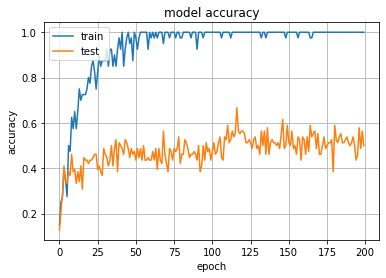

In [14]:
# Lets plot the results
print(history.history.keys())
# history accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.grid()
plt.show()

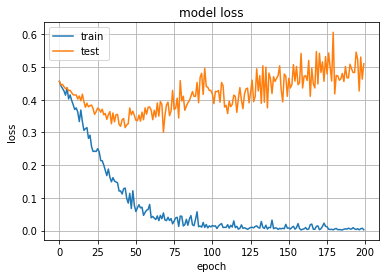

In [15]:
# history accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.grid()
plt.show()

In [16]:
# Lets predict
path = valDB + os.sep + "airport" + os.sep
imagesPredict = [f for f in listdir(path) if isfile(join(path,f))]

for file in imagesPredict:
    img = load_img(path + file, target_size=( 299, 299))
    tensorImage = img_to_array(img) /255.
    tensorImage = np.expand_dims(tensorImage, axis=0)
    prediction = model.predict(tensorImage, batch_size = 1)
    index = np.where(prediction[0] == max(prediction[0]))[0]
    if (0 != index[0].size):
        print("file "+ file + " is: " + classList[int(index[0])])

file airport_11_6_msrgb.jpg is: airport
file airport_11_7_msrgb.jpg is: airport
file airport_17_4_msrgb.jpg is: amusement_park
file airport_25_0_msrgb.jpg is: airport
file airport_3_5_msrgb.jpg is: amusement_park


In [17]:
loadedModel = load_model("XceptionModel.h5")

path = valDB + os.sep + "airport" + os.sep
imagesPredict = [f for f in listdir(path) if isfile(join(path,f))]
# print(imagesPredict)


for file in imagesPredict:
    img = load_img(path + file, target_size=( 299, 299))
    tensorImage = img_to_array(img) /255.
    tensorImage = np.expand_dims(tensorImage, axis=0)
    prediction = loadedModel.predict(tensorImage, batch_size = 1)
    index = np.where(prediction[0] == max(prediction[0]))[0]
    if (0 != index[0].size):
        print("file "+ file + " is: " + classList[int(index[0])])

file airport_11_6_msrgb.jpg is: airport
file airport_11_7_msrgb.jpg is: airport
file airport_17_4_msrgb.jpg is: amusement_park
file airport_25_0_msrgb.jpg is: airport
file airport_3_5_msrgb.jpg is: amusement_park
